<a href="https://colab.research.google.com/github/NigithaaG/PCOS-ML-Colab/blob/main/pcos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                 Feature  Importance
37      Follicle No. (R)    0.187847
36      Follicle No. (L)    0.125026
28      hair growth(Y/N)    0.064372
27      Weight gain(Y/N)    0.054754
29  Skin darkening (Y/N)    0.050695
8             Cycle(R/I)    0.031030
16            LH(mIU/mL)    0.027581
32       Fast food (Y/N)    0.025267
17                FSH/LH    0.024824
9     Cycle length(days)    0.023993
22            AMH(ng/mL)    0.023987
18             Hip(inch)    0.019657
0              Age (yrs)    0.018655
23            PRL(ng/mL)    0.018500
21           TSH (mIU/L)    0.017789
1            Weight (Kg)    0.016016
24        Vit D3 (ng/mL)    0.015706
15           FSH(mIU/mL)    0.015492
31          Pimples(Y/N)    0.015475
38  Avg. F size (L) (mm)    0.014672


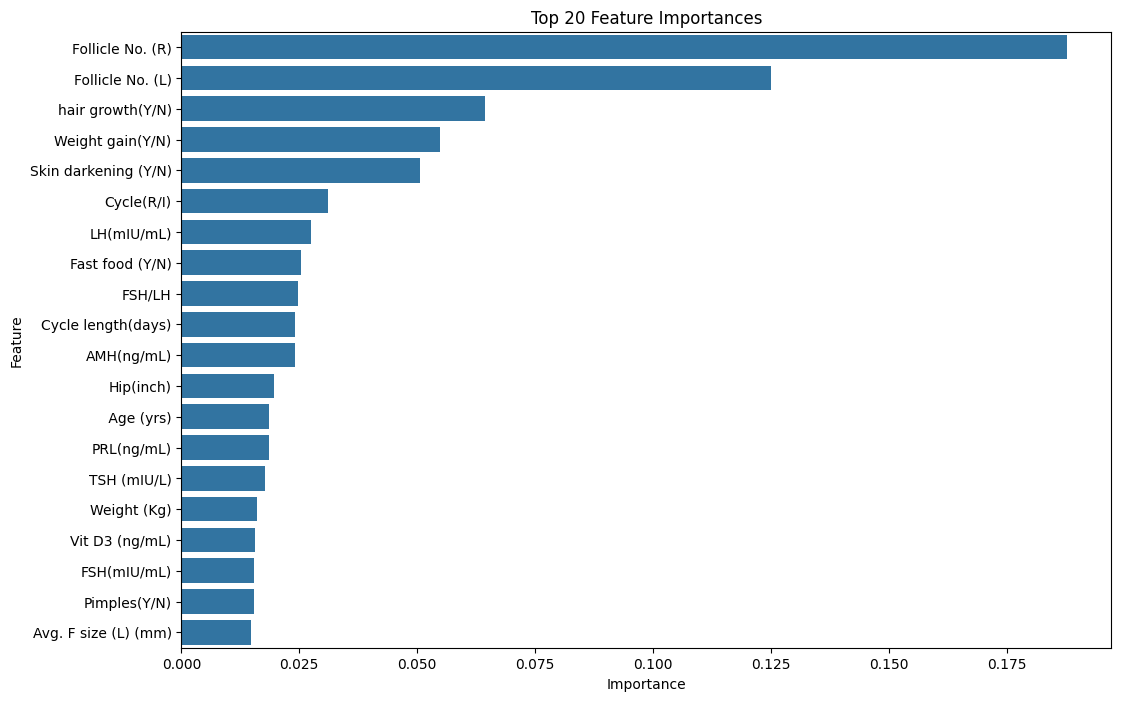

Top 20 Correlated Features with Target Variable:
['PCOS (Y/N)', 'Follicle No. (R)', 'Follicle No. (L)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Weight gain(Y/N)', 'Cycle(R/I)', 'Fast food (Y/N)', 'Pimples(Y/N)', 'Weight (Kg)', 'BMI', 'Waist(inch)', ' Age (yrs)', 'Hair loss(Y/N)', 'Hip(inch)', 'Cycle length(days)', 'Hb(g/dl)', 'Avg. F size (L) (mm)', 'Marraige Status (Yrs)', 'Avg. F size (R) (mm)']


<ipython-input-8-89e6f1bf7f9b>:45: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


In [ ]:
#Data Exploration and Preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('PCOS_extended_dataset.csv')

imputer = SimpleImputer(strategy='mean')
data['Marraige Status (Yrs)'].fillna(data['Marraige Status (Yrs)'].mean(), inplace=True)

label_encoder = LabelEncoder()
data['Blood Group'] = label_encoder.fit_transform(data['Blood Group'])

scaler = StandardScaler()
data[[' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI']] = scaler.fit_transform(data[[' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI']])

data.to_csv('preprocessed_data.csv', index=False)

#Feature Selection
X = data.drop(['PCOS (Y/N)', 'Sl. No', 'Patient File No.'], axis=1)
y = data['PCOS (Y/N)']

categorical_columns = X.select_dtypes(include=['object']).columns
for col in categorical_columns:
    X[col] = LabelEncoder().fit_transform(X[col])

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
top_n = 20
print(feature_importance_df.head(top_n))
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(top_n))
plt.title('Top {} Feature Importances'.format(top_n))
plt.show()

correlation_matrix = data.corr()
target_correlation = correlation_matrix['PCOS (Y/N)'].abs().sort_values(ascending=False)

top_correlated_features = target_correlation.head(20).index.tolist()
print("Top 20 Correlated Features with Target Variable:")
print(top_correlated_features)




In [ ]:
#Data Splitting
from sklearn.model_selection import train_test_split

X = data.drop(['PCOS (Y/N)', 'Sl. No', 'Patient File No.'], axis=1)
y = data['PCOS (Y/N)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

#Selecting Classification Algorithms
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

categorical_columns = X.select_dtypes(include=['object']).columns
for col in categorical_columns:
    X[col] = LabelEncoder().fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    KNeighborsClassifier(),
    GaussianNB(),
    XGBClassifier(),
    GradientBoostingClassifier(),
    MLPClassifier()
]

logistic_model = LogisticRegression(max_iter=5000)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy}')

results = {}

for clf in classifiers:
    try:
        scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
        print(f"{clf.__class__.__name__}: Accuracy - {scores.mean():.4f}, Standard Deviation - {scores.std():.4f}")
        results[clf.__class__.__name__] = scores.mean()
    except Exception as e:
        print(f"{clf.__class__.__name__} failed with error: {e}")

best_classifier_name = max(results, key=results.get)
best_classifier = next((clf for clf in classifiers if clf.__class__.__name__ == best_classifier_name), None)

best_classifier.fit(X_train, y_train)
y_pred = best_classifier.predict(X_test)



Training set shape: (1600, 41) (1600,)
Testing set shape: (400, 41) (400,)
Logistic Regression Accuracy: 0.9075
DecisionTreeClassifier: Accuracy - 0.9806, Standard Deviation - 0.0144
RandomForestClassifier: Accuracy - 0.9912, Standard Deviation - 0.0085
SVC: Accuracy - 0.7087, Standard Deviation - 0.0023
KNeighborsClassifier: Accuracy - 0.8244, Standard Deviation - 0.0072
GaussianNB: Accuracy - 0.8706, Standard Deviation - 0.0204
XGBClassifier: Accuracy - 0.9900, Standard Deviation - 0.0091
GradientBoostingClassifier: Accuracy - 0.9875, Standard Deviation - 0.0088
MLPClassifier: Accuracy - 0.8750, Standard Deviation - 0.0203


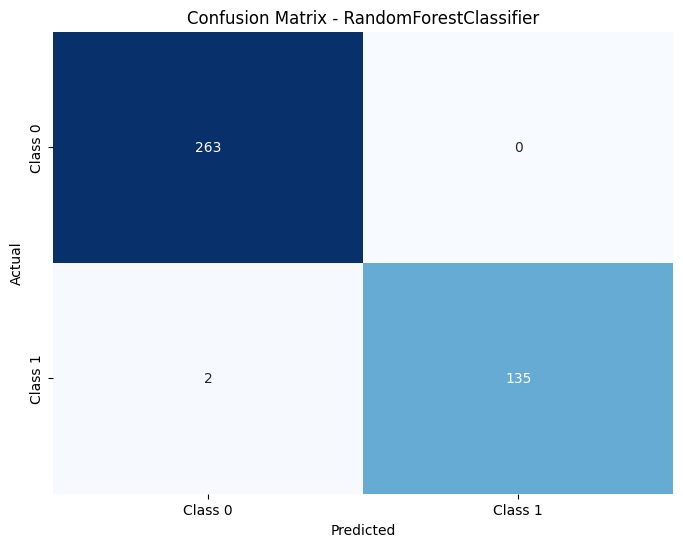

Classification Report (RandomForestClassifier):
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       263
           1       1.00      0.99      0.99       137

    accuracy                           0.99       400
   macro avg       1.00      0.99      0.99       400
weighted avg       1.00      0.99      0.99       400



In [ ]:
#confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, title):
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

def plot_classification_report(y_true, y_pred, title):
    classification_rep = classification_report(y_true, y_pred)
    print(f'Classification Report ({title}):\n', classification_rep)

plot_confusion_matrix(y_test, best_classifier.predict(X_test), best_classifier_name)
plot_classification_report(y_test, best_classifier.predict(X_test), best_classifier_name)


In [ ]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

xgb_classifier = XGBClassifier()

grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_classifier = grid_search.best_estimator_
y_pred = best_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


In [ ]:
#Cross-Validation
from sklearn.model_selection import cross_val_score

best_classifier = XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.1)
cv_scores = cross_val_score(best_classifier, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)

print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")


Cross-Validation Scores: [0.9975 0.99   1.     0.995  0.9975]
Mean Accuracy: 0.9960
Standard Deviation: 0.0034


In [ ]:
#Ensemble Methods
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

rf_model = RandomForestClassifier(random_state=42)
svc_model = SVC(probability=True, random_state=42)

stacking_model = StackingClassifier(
    estimators=[('rf', rf_model), ('svc', svc_model)],
    final_estimator=LogisticRegression()
)

cv_scores = cross_val_score(stacking_model, X_train, y_train, cv=5, scoring='accuracy')

print("Stacking Classifier:")
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())


Stacking Classifier:
Mean Accuracy: 0.991875
Standard Deviation: 0.00805256170420318


In [ ]:
from xgboost import XGBClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib
from sklearn.preprocessing import LabelEncoder

top_10_features = ['Follicle No. (R)', 'Follicle No. (L)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Weight gain(Y/N)',
                   'Cycle(R/I)', 'LH(mIU/mL)', 'Fast food (Y/N)', 'FSH/LH', 'Cycle length(days)']

X_top_10 = X[top_10_features]

X_train, X_test, y_train, y_test = train_test_split(X_top_10, y, test_size=0.2, random_state=42)

xgb_model = XGBClassifier()

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Classifier Accuracy on Test Set: {test_accuracy:.4f}")

joblib.dump(xgb_model, 'xgb_model_top_10.pkl')


XGBoost Classifier Accuracy on Test Set: 0.9875


['xgb_model_top_10.pkl']

In [ ]:
import joblib
import pandas as pd

xgb_model = joblib.load('xgb_model_top_10.pkl')
def classify_input(follicle_no_r,follicle_no_l,hair_growth,skin_darkening):
    follicle_no_r = float(input("Enter Follicle No. (R): "))
    follicle_no_l = float(input("Enter Follicle No. (L): "))
    hair_growth = input("Hair growth (Y/N): ")
    skin_darkening = input("Skin darkening (Y/N): ")
    weight_gain = input("Weight gain (Y/N): ")
    cycle = input("Cycle (R/I): ")
    lh = float(input("Enter LH (mIU/mL): "))
    fast_food = input("Fast food (Y/N): ")
    fsh_lh = float(input("Enter FSH/LH: "))
    cycle_length = float(input("Enter Cycle length (days): "))

    input_data = pd.DataFrame({
        'Follicle No. (R)': [follicle_no_r],
        'Follicle No. (L)': [follicle_no_l],
        'hair growth(Y/N)': [hair_growth],
        'Skin darkening (Y/N)': [skin_darkening],
        'Weight gain(Y/N)': [weight_gain],
        'Cycle(R/I)': [cycle],
        'LH(mIU/mL)': [lh],
        'Fast food (Y/N)': [fast_food],
        'FSH/LH': [fsh_lh],
        'Cycle length(days)': [cycle_length]
    })

    label_encoder = LabelEncoder()
    for column in input_data.columns:
        if input_data[column].dtype == 'object':
            input_data[column] = label_encoder.fit_transform(input_data[column])

    prediction = xgb_model.predict(input_data)

    if prediction[0] == 1:
        print("The prediction is PCOS (Y)")
    else:
        print("The prediction is not PCOS (N)")

classify_input()


FileNotFoundError: [Errno 2] No such file or directory: 'xgb_model_top_10.pkl'